<a href="https://www.kaggle.com/code/bnzn261029/eda-synthea-dataset?scriptVersionId=118592399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [11]:
import os

# https://www.geeksforgeeks.org/read-multiple-csv-files-into-separate-dataframes-in-python/
df_dict = dict()

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        csv_path = os.path.join(dirname, filename)
        temp_df = pd.read_csv(csv_path)
        df_dict[filename[:-4]] = temp_df
        print(csv_path, temp_df.shape)

/kaggle/input/synthea-dataset/observations.csv (739426, 9)
/kaggle/input/synthea-dataset/careplans.csv (4274, 9)
/kaggle/input/synthea-dataset/conditions.csv (43595, 6)
/kaggle/input/synthea-dataset/encounters.csv (69121, 15)
/kaggle/input/synthea-dataset/procedures.csv (115266, 9)
/kaggle/input/synthea-dataset/allergies.csv (831, 15)
/kaggle/input/synthea-dataset/claims.csv (138702, 31)
/kaggle/input/synthea-dataset/medications.csv (69581, 13)
/kaggle/input/synthea-dataset/payers.csv (10, 22)
/kaggle/input/synthea-dataset/organizations.csv (837, 11)
/kaggle/input/synthea-dataset/imaging_studies.csv (88053, 13)
/kaggle/input/synthea-dataset/supplies.csv (1383, 6)
/kaggle/input/synthea-dataset/patients.csv (1183, 27)
/kaggle/input/synthea-dataset/devices.csv (587, 7)
/kaggle/input/synthea-dataset/claims_transactions.csv (831277, 33)
/kaggle/input/synthea-dataset/payer_transitions.csv (50013, 8)
/kaggle/input/synthea-dataset/providers.csv (837, 12)
/kaggle/input/synthea-dataset/immunizat

# Immunizations

In [20]:
df_dict["immunizations"].columns

Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'BASE_COST'], dtype='object')

In [36]:
df_dict["immunizations"]["DATE"] = pd.to_datetime(df_dict["immunizations"]["DATE"])

In [158]:
print(df_dict["immunizations"]["PATIENT"].nunique(),
      df_dict["immunizations"]["CODE"].nunique(),
      df_dict["immunizations"]["ENCOUNTER"].nunique(),
      df_dict["immunizations"]["DATE"].nunique())

1176 22 12180 12048


In [218]:
df_dict["immunizations"]

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2013-03-26 20:32:41+00:00,6132a397-93f1-3f41-a63b-2c86042ae94c,cd5c1b99-8a07-325f-6709-23b97091612e,140,Influenza seasonal injectable preservative ...,136.0
1,2013-03-26 20:32:41+00:00,6132a397-93f1-3f41-a63b-2c86042ae94c,cd5c1b99-8a07-325f-6709-23b97091612e,62,HPV quadrivalent,136.0
2,2014-04-01 20:32:41+00:00,6132a397-93f1-3f41-a63b-2c86042ae94c,4442b292-4233-8ba8-f3c6-0df9f394818b,140,Influenza seasonal injectable preservative ...,136.0
3,2015-04-07 20:32:41+00:00,6132a397-93f1-3f41-a63b-2c86042ae94c,fa2cd5c6-de7b-5d30-4ddc-753e1c11498e,140,Influenza seasonal injectable preservative ...,136.0
4,2016-04-12 20:32:41+00:00,6132a397-93f1-3f41-a63b-2c86042ae94c,29956fe2-39f4-90a6-9312-ab53c1786b8f,140,Influenza seasonal injectable preservative ...,136.0
...,...,...,...,...,...,...
17360,2018-09-09 04:07:17+00:00,2e4dd3bd-639c-3906-3054-fb02775adba8,dd8c55ae-6b98-135f-19e5-dbccf1fec942,140,Influenza seasonal injectable preservative ...,136.0
17361,2019-09-15 04:07:17+00:00,2e4dd3bd-639c-3906-3054-fb02775adba8,2f99f674-41a9-05da-347c-39926f142e73,140,Influenza seasonal injectable preservative ...,136.0
17362,2020-06-21 04:07:17+00:00,2e4dd3bd-639c-3906-3054-fb02775adba8,152c5805-5810-b7b2-952c-649d7dc9383a,140,Influenza seasonal injectable preservative ...,136.0
17363,2021-02-14 04:07:17+00:00,2e4dd3bd-639c-3906-3054-fb02775adba8,fee0709f-5b46-7d70-37d5-4b207b96fd14,208,SARS-COV-2 (COVID-19) vaccine mRNA spike pro...,136.0


In [19]:
df_dict["immunizations"]["DESCRIPTION"].value_counts()

Influenza  seasonal  injectable  preservative free                                                                  9650
Td (adult) preservative free                                                                                         853
SARS-COV-2 (COVID-19) vaccine  mRNA  spike protein  LNP  preservative free  30 mcg/0.3mL dose                        738
SARS-COV-2 (COVID-19) vaccine  mRNA  spike protein  LNP  preservative free  100 mcg/0.5mL dose                       631
DTaP                                                                                                                 618
Pneumococcal conjugate PCV 13                                                                                        558
IPV                                                                                                                  541
meningococcal MCV4P                                                                                                  423
Hep B  adolescent or pediatric  

Frequency of immunizations by product.

In [51]:
df_dict["immunizations"]["PATIENT"].value_counts()

11483e8e-fd48-26a5-ed0e-2aaf065d460b    36
cd58c0b4-94a6-ee7e-7e45-3711f7424707    36
c65449f2-4f3b-b8d1-c69f-b74d7280298d    36
1bdf05c1-8a8e-921a-2513-578fdeb2b6a0    36
41df69eb-66a1-9319-de9c-0d0a700cd776    36
                                        ..
1591ffec-e1b8-3c2c-f241-d2edaf7c6044     2
a80f4d41-5e53-4fbf-79a4-65268db6d32b     2
a5278fab-673a-4e21-d803-abbce7550a17     2
41f69fc7-3f75-aea6-b3c8-e83303dcf953     1
397206ad-c701-ee99-c155-ce07bd3f7401     1
Name: PATIENT, Length: 1176, dtype: int64

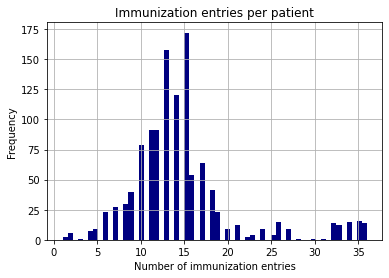

In [223]:
df_dict["immunizations"]["PATIENT"].value_counts().hist(bins=60)
plt.title("Immunization entries per patient")
plt.xlabel("Number of immunization entries")
plt.ylabel("Frequency")
plt.show()

Most patients have round about 15 entries in the immunization record.

In [55]:
df_dict["immunizations"]["DATE"].dt.year.unique().max(), df_dict["immunizations"]["DATE"].dt.year.unique().min()

(2022, 1946)

The documentation goes back to 1946.

In [221]:
df_dict["immunizations"]["DATE"].dt.year.value_counts().sort_index()

1946       1
1947       1
1948       2
1950       2
1951       2
        ... 
2018    1394
2019    1366
2020    1466
2021    2739
2022    1136
Name: DATE, Length: 76, dtype: int64

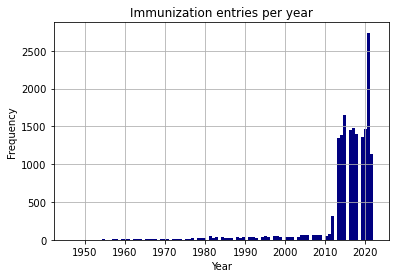

In [222]:
df_dict["immunizations"]["DATE"].dt.year.hist(bins=100)
plt.title("Immunization entries per year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

Most immunizations have been entered for 2021.

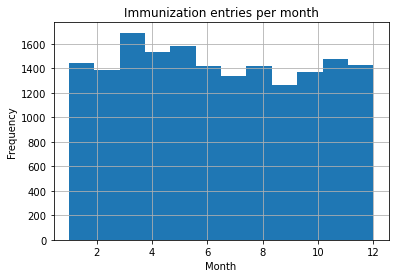

In [57]:
df_dict["immunizations"]["DATE"].dt.month.hist(bins=12)
plt.title("Immunization entries per month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

The immunizations are recorded equally distributed over the year.

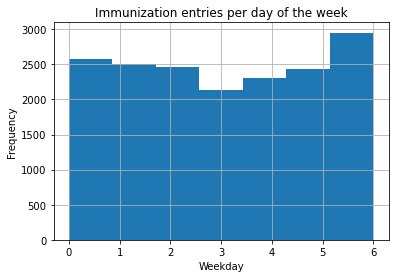

In [48]:
df_dict["immunizations"]["DATE"].dt.weekday.hist(bins=7)
plt.title("Immunization entries per day of the week")
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.show()

Not a realistic picture - immunizations are recorded equally on every weekday. It would have been expected that less immunizations will be recorded on weekend.

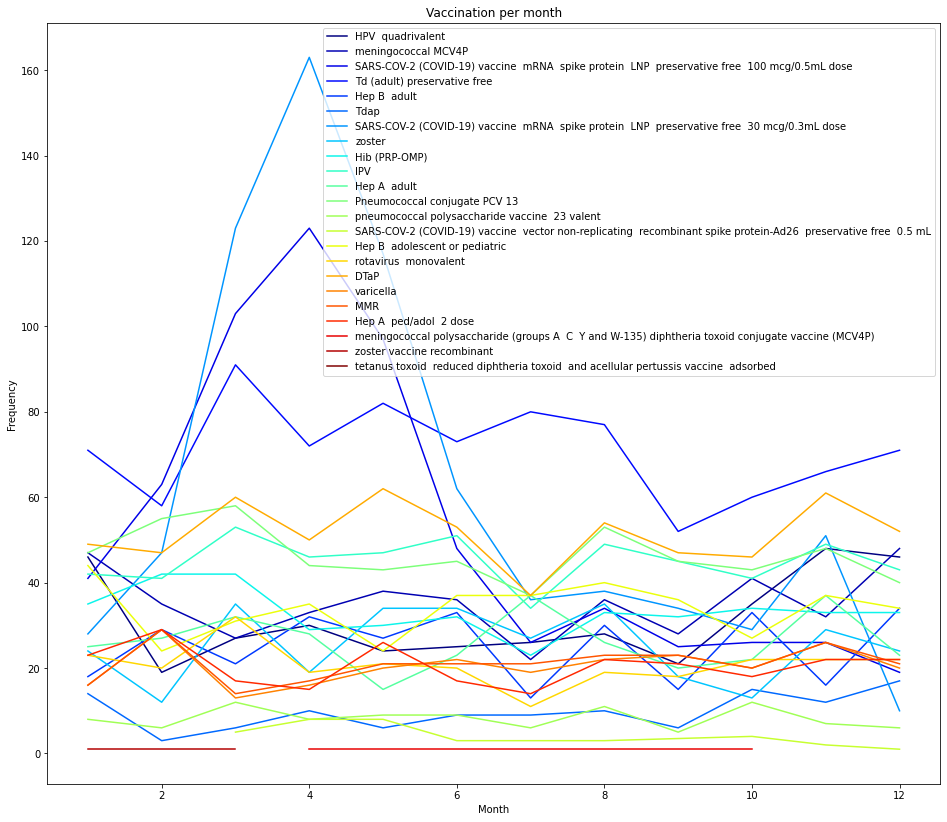

In [98]:
# https://stackoverflow.com/questions/45612129/cdf-matplotlib-not-enough-colors-for-plot-python
from cycler import cycler
vaccines = df_dict["immunizations"]["DESCRIPTION"].unique()[1:]

N = len(vaccines) # number of colors
plt.rcParams["axes.prop_cycle"] = cycler('color', plt.cm.jet(np.linspace(0,1,N)) )

plt.figure(figsize=(16,14))
for vaccine in vaccines:
    df_dict["immunizations"][df_dict["immunizations"]["DESCRIPTION"]==vaccine]["DATE"].dt.month.value_counts().sort_index().plot()

plt.legend(vaccines)
plt.title("Vaccination per month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

The most common immunization is against influenza virus. Distribution of immunization apart from influenza vaccine over the months.

## Clustering to Find Immunization Patterns

In [107]:
vacc_cluster = df_dict["immunizations"].groupby(by="PATIENT")["CODE"].value_counts()
vacc_cluster

PATIENT                               CODE
004325a9-1f28-f5f7-f887-dcea2b7646f5  140      6
                                      114      2
                                      207      2
                                      43       1
                                      113      1
                                              ..
ffb9943d-5b9d-7a38-6171-1b678b4650cf  113      1
fff95213-1ae1-eb35-7f27-857560f53529  140     10
                                      121      2
                                      208      2
                                      113      1
Name: CODE, Length: 5323, dtype: int64

In [169]:
unique_codes = list(df_dict["immunizations"]["CODE"].unique())

vacc_cluster_encoded = []
patient = ["004325a9-1f28-f5f7-f887-dcea2b7646f5"]
line = [0]*len(unique_codes)

for item in list(vacc_cluster.iteritems()):
    if patient[-1] != item[0][0]:
        vacc_cluster_encoded.append(line)
        line = [0]*len(unique_codes)
        patient.append(item[0][0])
    line[unique_codes.index(item[0][1])] = item[1]
vacc_cluster_encoded.append(line)

In [214]:
from sklearn.cluster import KMeans

n_clusters = 5
km = KMeans(n_clusters=n_clusters, max_iter=100, n_init=1, verbose=0).fit(vacc_cluster_encoded)
clustering_results = km.predict(vacc_cluster_encoded)

In [215]:
pat_vacc_cluster = pd.DataFrame()
pat_vacc_cluster["PATIENT"] = patient
pat_vacc_cluster["CLUSTER"] = clustering_results
pat_vacc_cluster

,PATIENT,CLUSTER
0,004325a9-1f28-f5f7-f887-dcea2b7646f5,4
1,009e61d0-b348-55d8-4324-abacd2a87bc1,4
2,00b8ab53-47b0-04e3-7054-09d7069ea4f7,1
3,00d53fb9-b360-3cd3-833b-1245f9433380,2
4,00e5d620-3f16-a0ba-42e3-8d117bb069ef,1
...,...,...
1171,ffa2645b-3479-9cf3-7c1e-fed5637acd64,1
1172,ffaba8e3-64b3-dccc-d781-3efab66a8bd9,3
1173,ffb47537-99d2-aade-286f-622b6b1822d6,1
1174,ffb9943d-5b9d-7a38-6171-1b678b4650cf,1


In [216]:
pat_vacc_cluster["CLUSTER"].value_counts()

1    630
4    231
3    179
2     78
0     58
Name: CLUSTER, dtype: int64

# Patients

In [225]:
df_dict["patients"].columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'FIPS',
       'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE',
       'INCOME'],
      dtype='object')

In [226]:
df_dict["patients"]["BIRTHDATE"] = pd.to_datetime(df_dict["patients"]["BIRTHDATE"])

In [242]:
recent_year = pd.datetime.today().year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [244]:
for cluster in range(n_clusters):
    print("Cluster", cluster, "; mean age", recent_year - int(df_dict["patients"][df_dict["patients"]["Id"].isin(pat_vacc_cluster[pat_vacc_cluster["CLUSTER"]==cluster]["PATIENT"])]["BIRTHDATE"].dt.year.mean()))
    for item in (df_dict["immunizations"][df_dict["immunizations"]["PATIENT"].isin(pat_vacc_cluster[pat_vacc_cluster["CLUSTER"]==cluster]["PATIENT"])].CODE.value_counts()).iteritems():
        print(item[1], df_dict["immunizations"]["DESCRIPTION"][df_dict["immunizations"]["CODE"]==item[0]].unique()[0])
    print()

Cluster 0 ; mean age 9
188 DTaP
176 Pneumococcal conjugate PCV 13
170 Hep B  adolescent or pediatric
169 IPV
157 Hib (PRP-OMP)
135 Influenza  seasonal  injectable  preservative free
100 rotavirus  monovalent
65 Hep A  ped/adol  2 dose
44 MMR
41 varicella

Cluster 1 ; mean age 63
6150 Influenza  seasonal  injectable  preservative free
583 Td (adult) preservative free
410 SARS-COV-2 (COVID-19) vaccine  mRNA  spike protein  LNP  preservative free  30 mcg/0.3mL dose
396 SARS-COV-2 (COVID-19) vaccine  mRNA  spike protein  LNP  preservative free  100 mcg/0.5mL dose
273 zoster
209 Hep A  adult
99 pneumococcal polysaccharide vaccine  23 valent
90 Pneumococcal conjugate PCV 13
77 Hep B  adult
33 meningococcal MCV4P
18 IPV
17 MMR
16 SARS-COV-2 (COVID-19) vaccine  vector non-replicating  recombinant spike protein-Ad26  preservative free  0.5 mL
14 varicella
9 Hib (PRP-OMP)
9 Hep A  ped/adol  2 dose
9 DTaP
6 Hep B  adolescent or pediatric
2 rotavirus  monovalent
2 zoster vaccine recombinant
2 Tdap

# ToDo
- [ ] Find the optimal number of clusters.
- [X] Get patient age for each cluster.